In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.dpi'] = 100.    
font_size = 10
plt.rcParams.update({'font.size': font_size})

In [152]:
class TwoBody():
    """
    This class implements the coupled ODES for the two body problem.
    Parameters:
    m : float
        mass of planet 1
    M : float
        mass of planet 2 (typically the larger mass)
    Coordinates of m (x,y)
    Coordinates of M (X,Y)
        
    Methods
    _______
    
    dy_dt(t,y)
        Returns the right side of the differential equation in vector y, 
        given corresponding values of y, t.
        The vector y is an 8 component vector [x,y,X,Y,xdot,ydot,Xdot,Ydot]
    """
    def __init__(self, m=1,M=10):
        self.m = m
        self.M = M
        
    def dy_dt(self, t, y):
        #Returns the RHS of [dx/dt dy/dt dX/dt d^2x/dt^2 d^2y/dt^2 d^2X/dt^2 d^2Y/dt^2]
        r = np.sqrt((y[0]-y[2])**2 + (y[1]-y[3])**2)
        r3 = r**3
        return [y[4],y[5],y[6],y[7],-self.M*(y[0]-y[2])/r3, -self.M*(y[1]-y[3]), self.m*(y[0]-y[2])/r3, self.m*(y[1]-y[3])/r3]
    
    def solve_ode(self, t_pts, x0, y0, X0, Y0, xdot_0, ydot_0, Xdot_0, Ydot_0,
                  abserr=1.0e-12, relerr=1.0e-12):
        """
        Solves the ODEs given initial conditions.
        """
        y = [x0, y0, X0, Y0, xdot_0, ydot_0, Xdot_0, Ydot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr, method='DOP853')
        x, y, X, Y, xdot, ydot, Xdot, Ydot = solution.y

        return  x, y, X, Y, xdot, ydot, Xdot, Ydot 
    
    def solve_ode_Leapfrog(self, t_pts, x0, y0, X0, Y0, xdot_0, ydot_0, Xdot_0, Ydot_0):
        """
        Solve the ODE given initial conditions with the Leapfrog method.
        """
        delta_t = t_pts[1] - t_pts[0]
        
        # initialize the arrays for 
        num_t_pts = len(t_pts)
        x = np.zeros(num_t_pts)
        xdot = np.zeros(num_t_pts)
        xdot_half = np.zeros(num_t_pts)
        
        y = np.zeros(num_t_pts)
        ydot = np.zeros(num_t_pts)
        ydot_half = np.zeros(num_t_pts)
        
        X = np.zeros(num_t_pts)
        Xdot = np.zeros(num_t_pts)
        Xdot_half = np.zeros(num_t_pts)
        
        Y = np.zeros(num_t_pts)
        Ydot = np.zeros(num_t_pts)
        Ydot_half = np.zeros(num_t_pts)
        
        
        # initial conditions
        x[0] = x0
        y[0] = y0
        X[0] = X0
        Y[0] = Y0
        xdot[0] = xdot_0
        ydot[0] = ydot_0
        Xdot[0] = Xdot_0
        Ydot[0] = Ydot_0
        
        # step through the differential equation
        for i in np.arange(num_t_pts - 1):
            t = t_pts[i]
            K = [x[i],y[i],X[i],Y[i],xdot[i],ydot[i],Xdot[i],Ydot[i]]
            xdot_half[i] = xdot[i] + self.dy_dt(t, K)[4] * delta_t/2.
            ydot_half[i] = ydot[i] + self.dy_dt(t, K)[5] * delta_t/2.
            Xdot_half[i] = Xdot[i] + self.dy_dt(t, K)[6] * delta_t/2.
            Ydot_half[i] = Ydot[i] + self.dy_dt(t, K)[7] * delta_t/2.
            
            x[i+1] = x[i] + xdot_half[i] * delta_t
            y[i+1] = y[i] + ydot_half[i] * delta_t
            X[i+1] = X[i] + Xdot_half[i] * delta_t
            Y[i+1] = Y[i] + Ydot_half[i] * delta_t
            
            K = [x[i+1],y[i],X[i],Y[i],xdot[i],ydot[i],Xdot[i],Ydot[i]]
            xdot[i+1] = xdot_half[i] + self.dy_dt(t, K)[4] * delta_t/2.
            K = [x[i+1],y[i+1],X[i],Y[i],xdot[i],ydot[i],Xdot[i],Ydot[i]]
            ydot[i+1] = ydot_half[i] + self.dy_dt(t, K)[5] * delta_t/2.
            K = [x[i+1],y[i+1],X[i+1],Y[i],xdot[i],ydot[i],Xdot[i],Ydot[i]]
            Xdot[i+1] = Xdot_half[i] + self.dy_dt(t, K)[6] * delta_t/2.
            K = [x[i+1],y[i+1],X[i+1],Y[i+1],xdot[i],ydot[i],Xdot[i],Ydot[i]]
            Ydot[i+1] = Ydot_half[i] + self.dy_dt(t, K)[7] * delta_t/2.
            
        return  x, y, X, Y, xdot, ydot, Xdot, Ydot 
        

In [153]:
m = 0.001
M = 1
Tb = TwoBody(m=m, M=M)

t_start = 0.
t_end = 10.
delta_t = 0.0001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

x0 = 1
y0 = 0
X0 = 0
Y0 = 0
xdot_0 = 0
ydot_0 = 1
Xdot_0 = 0
Ydot_0 = 0

x, y, X, Y, xdot, ydot, Xdot, Ydot  = Tb.solve_ode_Leapfrog(t_pts, x0, y0, X0, Y0, xdot_0, ydot_0, Xdot_0, Ydot_0)

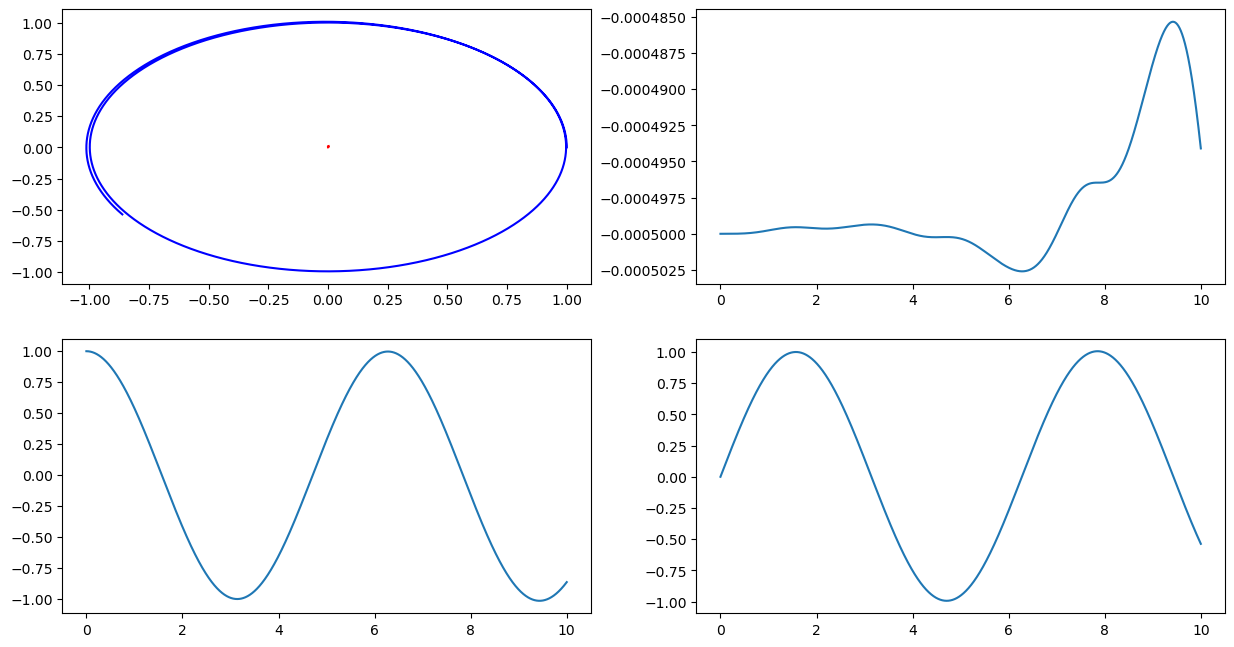

In [154]:
fig = plt.figure(figsize=(15,8))
ax_a = fig.add_subplot(2,2,1)
ax_b = fig.add_subplot(2,2,2)
ax_c = fig.add_subplot(2,2,3)
ax_d = fig.add_subplot(2,2,4)

ax_a.plot(x, y, 'blue')
ax_a.plot(X, Y, 'red')
ax_c.plot(t_pts, x)
ax_d.plot(t_pts, y)
r = np.sqrt((x-X)**2 + (y-Y)**2)
H = 1/2*m*(xdot**2 + ydot**2)+1/2*M*(Xdot**2+Ydot**2)-m*M/r
ax_b.plot(t_pts, H)

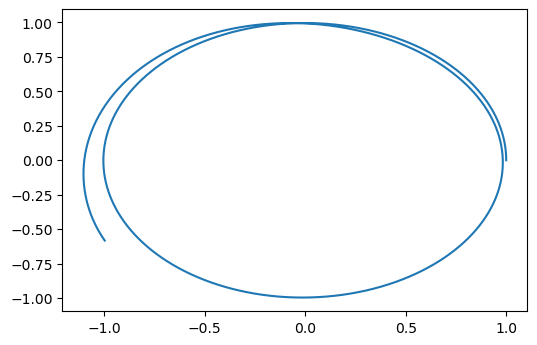

In [141]:
xprime = x-X
yprime = y-Y
plt.plot(xprime, yprime)